<img src='https://github.com/mbdfmad/fmad2223/raw/main/fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
2022-10-17 Exam.
<a class="tocSkip">   
</h1>  

# Instructions <a class="tocSkip">

+ The exam consists of a short Moodle quiz and a data analysis exercise described below in this notebook. You can access the quiz in this link:  
    [https://sifo.comillas.edu/mod/quiz/view.php?id=2579775&forceview=1](https://sifo.comillas.edu/mod/quiz/view.php?id=2579775&forceview=1)  

+ The exam quiz accounts for a 20% of the exam grade and the data analysis accounts for the remaining 80%. We recommend that you don't use more than 20-25 minutes for the quiz!

+ All the questions in the exam have the same value.
    
+ During the exam you can use code fragments from the lectures, check your notes, go online to read documentation, etc. The only requirement is that the exam reflects your individual work.  
    **Please take this as a warning: getting external help during the exam will not be tolerated and already has had dire consequences in the past.** 
    
+ Use this notebook to answer the exam question. When you are done simply email the notebook with your answers to [fsansegundo@comillas.edu](mailto:"fsansegundo@comillas.edu)   

    

# Introduction to the Data Set <a class="tocSkip">
    
+ For this exam we will be using a data set containing information about crime rates in different communities of the US in 1990. This data set has been adapted for the exam, starting from a classical example frequently used for Machine Learning models. You can find more information about this data set and the meaning of the variable names in the following link (look for the *Attribute Information* section):

  [https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime)  

+ You can download the data set using this link:
  
    [crimes_exam_data.csv](https://gist.githubusercontent.com/fsansegundo/513d3468f832bf9c928bdb010230447b/raw/580a33130ad481aa9ec68f07225e7c8e19a5abbe/crimes_exam_data.csv)

# Preliminaries <a class="tocSkip">

+ We add here the import commands for the common data science libraries so you don't have to waste time importing them. **But we warned that you may need additional imports for some questions!**

In [283]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
sns.set()

+ Read the data file into a pandas `DataFrame` **called `crimes`**, which we will use for the rest of the exam.

In [284]:
crimes_url = "https://gist.githubusercontent.com/fsansegundo/513d3468f832bf9c928bdb010230447b/raw/580a33130ad481aa9ec68f07225e7c8e19a5abbe/crimes_exam_data.csv"
crimes = pd.read_csv(crimes_url)
crimes = pd.read_csv("crimes_exam_data.csv")

# Questions <a class="tocSkip">

### Question 1:  <a class="tocSkip">

+ How many rows are there in the table? 
+ How many variables?    
+ Which variable has the most missing data? 
    
After answering this question **make sure to remove all rows containing missing data** from the table before proceeding to the next question.

**Answer:**

Data size (rows & columns):

In [285]:
crimes.shape

(2215, 23)

Missing values:

In [286]:
crimes_nulls = crimes.isnull().sum() 
crimes_nulls.sort_values(ascending=False)[:12]

ViolentCrimesPerPop    221
rapesPerPop            208
nonViolPerPop           97
arsonsPerPop            91
assaultPerPop           13
autoTheftPerPop          3
larcPerPop               3
burglPerPop              3
robbbPerPop              1
LemasPctOfficDrugUn      0
murdPerPop               0
communityname            0
dtype: int64

In [287]:
crimes.dropna(inplace=True)

In [288]:
crimes.isnull().sum().max()

0

### Question 2:  <a class="tocSkip">

+ Show the variables in the data set and their types. If there are categorical variables identify them and convert them to that type. 
    
**Answer:**

In [289]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 2214
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   communityname        1902 non-null   object 
 1   state                1902 non-null   object 
 2   population           1902 non-null   int64  
 3   householdsize        1902 non-null   float64
 4   agePct12t21          1902 non-null   float64
 5   agePct12t29          1902 non-null   float64
 6   agePct16t24          1902 non-null   float64
 7   agePct65up           1902 non-null   float64
 8   pctUrban             1902 non-null   float64
 9   medIncome            1902 non-null   int64  
 10  PctPopUnderPov       1902 non-null   float64
 11  PopDens              1902 non-null   float64
 12  LemasPctOfficDrugUn  1902 non-null   float64
 13  murdPerPop           1902 non-null   float64
 14  rapesPerPop          1902 non-null   float64
 15  robbbPerPop          1902 non-null   f

In [290]:
crimes.state = crimes.state.astype('category')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 2214
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   communityname        1902 non-null   object  
 1   state                1902 non-null   category
 2   population           1902 non-null   int64   
 3   householdsize        1902 non-null   float64 
 4   agePct12t21          1902 non-null   float64 
 5   agePct12t29          1902 non-null   float64 
 6   agePct16t24          1902 non-null   float64 
 7   agePct65up           1902 non-null   float64 
 8   pctUrban             1902 non-null   float64 
 9   medIncome            1902 non-null   int64   
 10  PctPopUnderPov       1902 non-null   float64 
 11  PopDens              1902 non-null   float64 
 12  LemasPctOfficDrugUn  1902 non-null   float64 
 13  murdPerPop           1902 non-null   float64 
 14  rapesPerPop          1902 non-null   float64 
 15  robbbPerPop          

### Question 3:  <a class="tocSkip">

+ For the variables `population`, `householdsize`, `pctUrban`, `medIncome`, `PctPopUnderPov`, `PopDens` do a basic numeric summary that contains their mean, median, quartiles, sd and range (min and max).  
 *Hint:* you can do this in a single table for all those variables. 

+ Make a *pairplot* for all these variables.    
    
**Answer:**    

In [291]:
q3_vars = ['population', 'householdsize', 'pctUrban', 'medIncome', 'PctPopUnderPov', 'PopDens']
crimes[q3_vars].describe()

,population,householdsize,pctUrban,medIncome,PctPopUnderPov,PopDens
count,1.902000e+03,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,5.248226e+04,2.712077,69.960931,33947.199790,11.674858,2803.496793
std,2.060649e+05,0.347385,44.270759,13497.931524,8.477675,2944.885801
min,1.000500e+04,1.600000,0.000000,12908.000000,0.640000,10.000000
25%,1.432350e+04,2.500000,0.000000,23702.750000,4.630000,1175.925000
50%,2.268100e+04,2.660000,100.000000,31268.000000,9.425000,2000.700000
75%,4.324975e+04,2.860000,100.000000,41484.750000,17.040000,3277.375000
max,7.322564e+06,5.280000,100.000000,123625.000000,48.820000,44229.900000


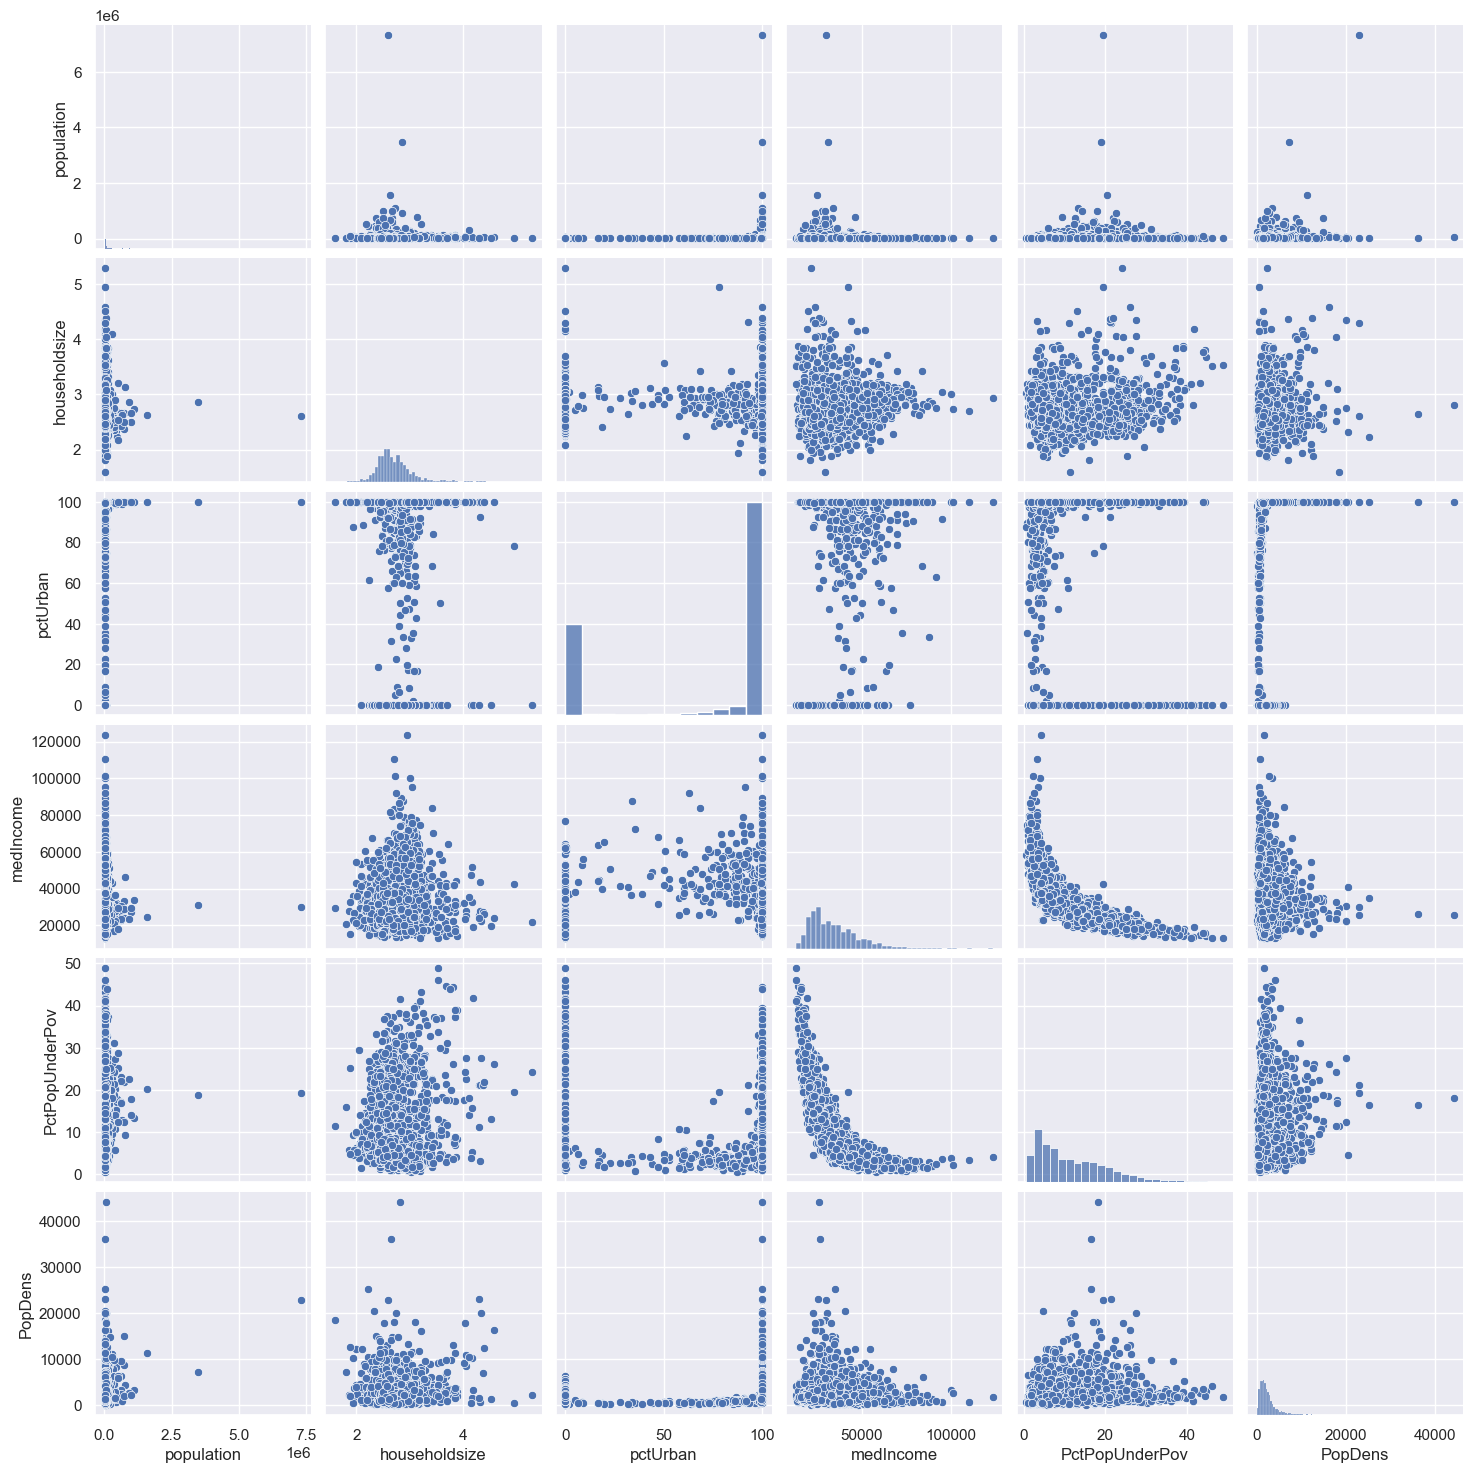

In [292]:
# crimes_cols = list(crimes.columns)
# crimes_cols

sns.pairplot(data = crimes, vars=q3_vars)
plt.show()

### Question 4:  <a class="tocSkip">

+ Create a new column called `houseSize` dividing (binning) `householdSize` in 8 levels, from 1 to 5.5 in increments of 0.5:  
    $(1, 1.5],\quad (1.5, 2],\,\ldots\,, (4.5, 5],\quad (5, 5.5]$

+ Make a *frequencies table* for `houseSize` containing the absolute and relative frequencies (in the same table). 
    
+ Looking at the pair plot observe the distribution of `pctUrban`. Find the number of communities that are *not purely urban but also not purely rural*. That is, find the number of rows of the table where  `pctUrban` is *simultaneously* bigger than 10 and smaller than 90. **Discard these rows from the table, but keep the name `crimes` for the resulting table.**
    
+ **After doing that** create another column called `isUrban` with value `True` if `pctUrban` $\geq 90$ and value `False` otherwise. Create a relative frequency table for `isUrban`.
    

**Answer:**    

In [293]:
houseSize_nodes = np.arange(1, 6, 0.5) 
print(houseSize_nodes)

[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


In [294]:
crimes['houseSize'] = pd.cut(crimes['householdsize'], bins=houseSize_nodes, ordered=True)
crimes[['houseSize', 'householdsize']].iloc[:10]

,houseSize,householdsize
0,"(3.0, 3.5]",3.10
1,"(2.5, 3.0]",2.82
2,"(2.0, 2.5]",2.43
5,"(2.0, 2.5]",2.45
6,"(2.5, 3.0]",2.60
7,"(2.0, 2.5]",2.45
8,"(2.0, 2.5]",2.46
9,"(2.5, 3.0]",2.62
10,"(2.5, 3.0]",2.54
11,"(2.5, 3.0]",2.89


In [295]:
absFreqs = crimes.houseSize.value_counts().sort_index()
relFreqs = crimes.houseSize.value_counts(normalize=True).sort_index()
relCumFreqs = relFreqs.cumsum()
absFreqs
freqTable = pd.DataFrame({'absFreqs':absFreqs, 
                          'relFreqs':relFreqs,
                          'relCumFreqs':relCumFreqs})
freqTable


,absFreqs,relFreqs,relCumFreqs
"(1.0, 1.5]",0,0.000000,0.000000
"(1.5, 2.0]",12,0.006309,0.006309
"(2.0, 2.5]",482,0.253417,0.259727
"(2.5, 3.0]",1134,0.596215,0.855941
"(3.0, 3.5]",209,0.109884,0.965825
"(3.5, 4.0]",44,0.023134,0.988959
"(4.0, 4.5]",17,0.008938,0.997897
"(4.5, 5.0]",3,0.001577,0.999474
"(5.0, 5.5]",1,0.000526,1.000000


In [296]:
#crimes.pctUrban > 90
nonPure = (crimes.pctUrban > 10) & (crimes.pctUrban < 90)
sum(nonPure)

131

+ The following copy is used to compute the results for those who do not remove data in this step.

In [297]:
crimes2 = crimes.copy()

In [298]:
crimes = crimes.loc[~nonPure, :]
crimes.describe()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,medIncome,PctPopUnderPov,PopDens,...,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,1.771000e+03,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,...,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000
mean,5.499429e+04,2.702434,14.458108,27.801378,14.081350,12.039164,69.900711,32983.594579,12.247623,2961.826595,...,6.312716,37.817487,177.029554,392.291107,1099.609944,3476.681677,504.629921,33.146725,613.451073,5114.067984
std,2.133277e+05,0.349187,4.498636,6.180601,5.937126,4.760581,45.610879,13066.895920,8.481151,2990.876951,...,9.259585,34.745997,241.572062,413.098177,784.193004,1884.789506,515.954213,40.059231,617.469302,2731.105035
min,1.000500e+04,1.600000,4.580000,9.380000,4.640000,1.660000,0.000000,12908.000000,0.930000,10.000000,...,0.000000,0.000000,0.000000,0.000000,31.010000,77.860000,6.550000,0.000000,6.640000,116.790000
25%,1.466350e+04,2.490000,12.210000,24.545000,11.420000,8.975000,0.000000,23269.500000,5.230000,1345.150000,...,0.000000,13.230000,33.750000,105.555000,556.490000,2110.575000,175.360000,7.850000,187.415000,3135.455000
50%,2.368200e+04,2.630000,13.650000,26.910000,12.630000,11.920000,100.000000,30007.000000,10.400000,2139.700000,...,3.000000,28.970000,88.810000,250.490000,913.830000,3166.550000,328.900000,22.200000,402.750000,4658.940000
75%,4.573250e+04,2.840000,15.460000,29.400000,14.480000,14.610000,100.000000,39886.500000,17.500000,3399.050000,...,9.105000,53.435000,210.850000,545.330000,1426.260000,4435.680000,639.670000,43.795000,828.205000,6502.285000
max,7.322564e+06,5.280000,50.800000,70.510000,63.620000,48.350000,100.000000,123625.000000,48.820000,44229.900000,...,91.090000,401.350000,2264.130000,3486.140000,11881.020000,22164.780000,4968.590000,436.370000,4877.060000,27010.770000


In [299]:
nonPure = (crimes.pctUrban > 10) & (crimes.pctUrban < 90)
sum(nonPure)

0

In [300]:
crimes['isUrban'] = (crimes.pctUrban >= 90)

In [301]:
relFreqs_isUrban = crimes.isUrban.value_counts(normalize=True).sort_index()
relFreqs_isUrban

False    0.298701
True     0.701299
Name: isUrban, dtype: float64

### Question 5:  <a class="tocSkip">

    
+ Make a plot showing (in the same plot) a histogram and density curve for `householdSize`. For the histogram make sure to use the same bins that you used for creating `houseSize`
    
+ Make a boxplot of `medIncome`. How many outliers are there? What community corresponds to the first (smallest) and last outliers (use the `comunityname` variable to find out their names).  

**Answer:**

<AxesSubplot:xlabel='householdsize', ylabel='Count'>

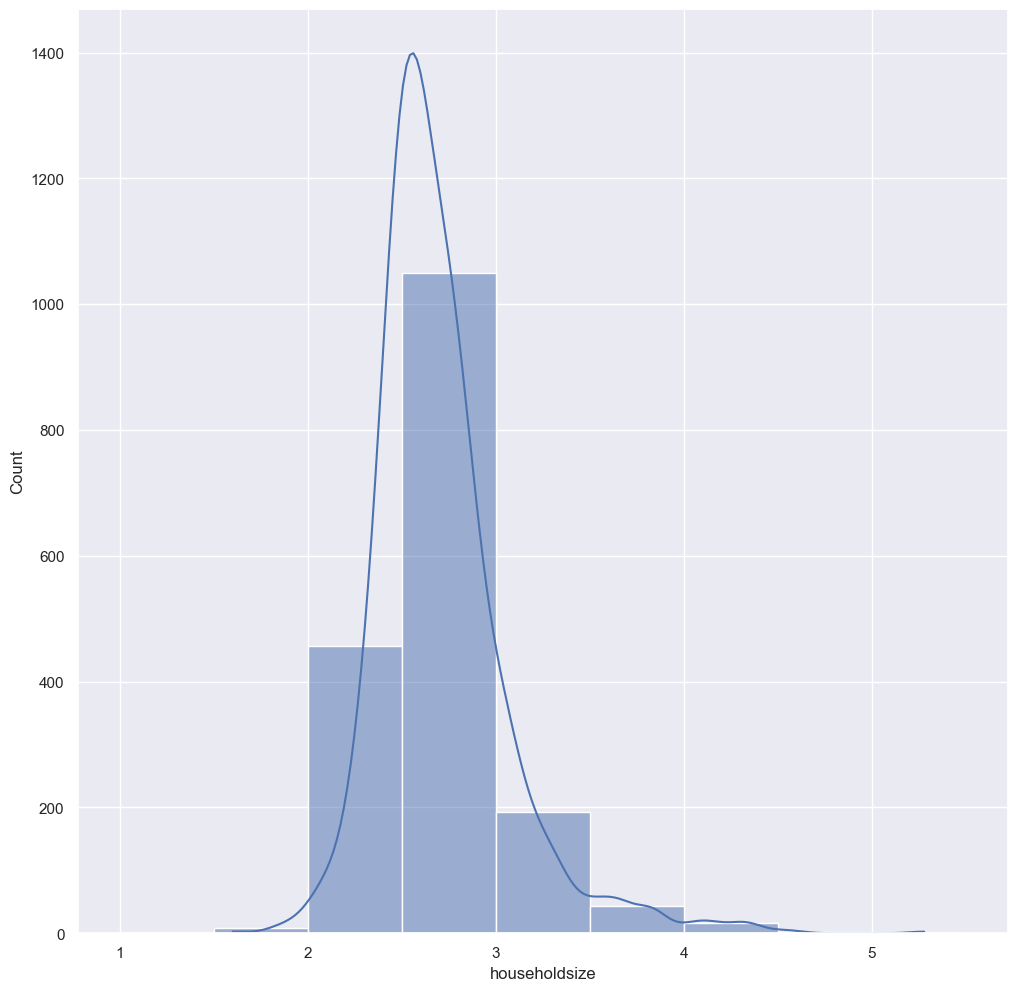

In [302]:
plotVar = 'householdsize'
sns.histplot(x = plotVar, data=crimes, kde = True, bins = houseSize_nodes)

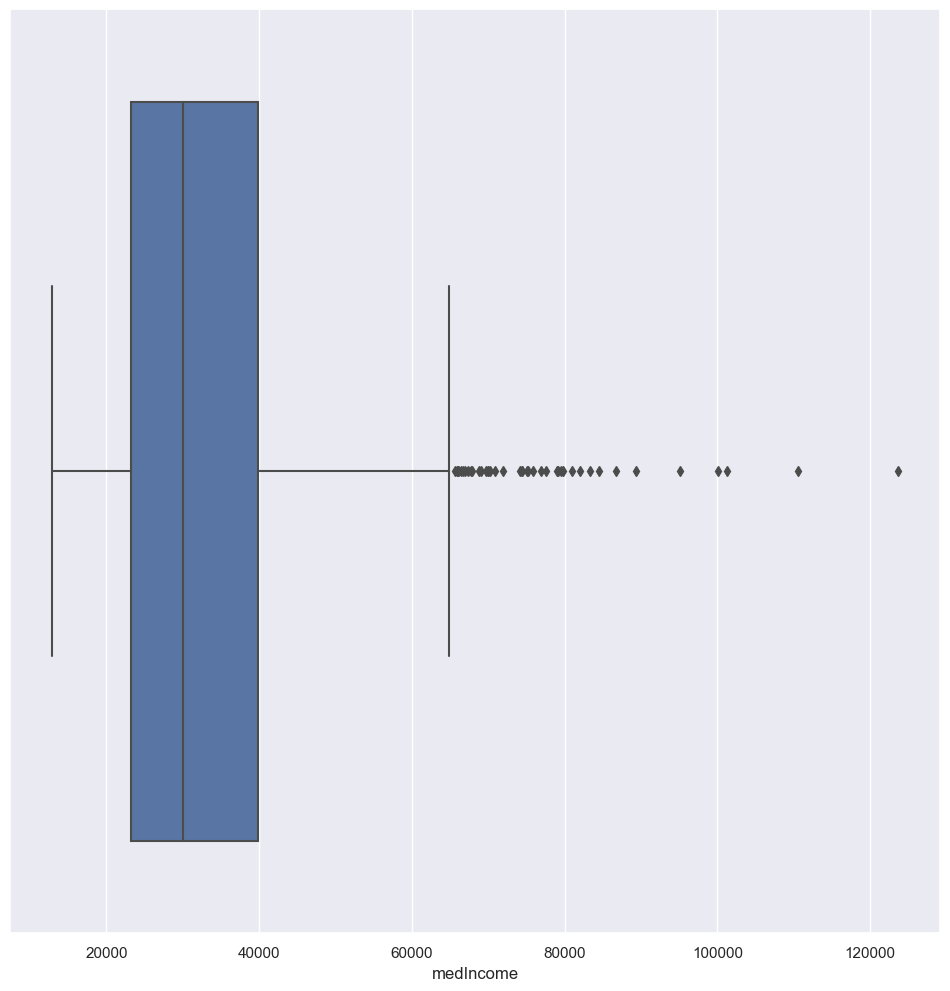

In [303]:
sns.boxplot(x = 'medIncome', data=crimes)
plt.show()

In [304]:
medIncome_quants = crimes.medIncome.quantile(q=[0.25, 0.75]).values
print(medIncome_quants)
medIncome_ICR = medIncome_quants[1] - medIncome_quants[0]
medIncome_ICR

[23269.5 39886.5]


16617.0

In [305]:
out_begin = medIncome_quants[1] + 1.5 * medIncome_ICR
out_begin

64812.0

In [306]:
medIncome_outliers = crimes.loc[crimes.medIncome > out_begin]
len(medIncome_outliers)

42

In [307]:
outMin = medIncome_outliers.medIncome.min()
outMin_pos = crimes.loc[crimes.medIncome == outMin].index

In [308]:
[crimes.communityname[outMin_pos]]

[317    Ramseyborough
 Name: communityname, dtype: object]

In [309]:
outMax = medIncome_outliers.medIncome.max()
outMax_pos = crimes.loc[crimes.medIncome == outMax].index

In [310]:
print(crimes.communityname[outMax_pos])

2105    Hillsboroughtown
Name: communityname, dtype: object


#### Versión usando el IQR de stats



In [311]:
medIncome_ICR_2 = stats.iqr(crimes.medIncome)
print(medIncome_ICR_2)

16617.0


In [312]:
out_begin_2 = medIncome_quants[1] + 1.5 * medIncome_ICR
out_begin_2

64812.0

In [313]:
medIncome_outliers_2 = crimes.loc[crimes.medIncome > out_begin_2]
len(medIncome_outliers_2)

42

In [314]:
outMin_2 = medIncome_outliers_2.medIncome.min()
outMin_pos_2 = crimes.loc[crimes.medIncome == outMin_2].index

In [315]:
[crimes.communityname[outMin_pos_2]]

[317    Ramseyborough
 Name: communityname, dtype: object]

In [316]:
outMax_2 = medIncome_outliers_2.medIncome.max()
outMax_pos_2 = crimes.loc[crimes.medIncome == outMax_2].index

In [317]:
print(crimes.communityname[outMax_pos_2])

2105    Hillsboroughtown
Name: communityname, dtype: object


### Question 6:  <a class="tocSkip">
    
    
+ Find the total population for each state, adding up the observations in the table corresponding to that state. 

+ Create a new data set containing only the data corresponding to the five most populated states. Call that new data set `crimesTop5`.

<hr style='border: 1px dashed blue'>
    
**Before going on:** make sure that you create a list called `top5names` with the names of the top 5 most populated states. For example, this could be 
```
top5Names = ['DC', 'FL', 'PA', 'TX', 'FL']    
```
(but it is not! you have to find the real one)  Then, when you have created the list, run this code to remove the levels for the non top 5 states:
```    
top5_cat = pd.CategoricalDtype(top5Names)
crimesTop5 = crimesTop5.copy()
crimesTop5['state'] = crimesTop5.state.astype(top5_cat)    
```    
<hr style='border: 1px dashed blue'>    
    
+ After doing that, and using the data in `crimesTop5`, find the median by state of `ViolentCrimesPerPop`. Also choose a good plot to visualize the (possible) relation between these two variables.  
 **Optional:** Make a graphic judgment: does this relation depend on the `isUrban` variable?

**Answer:**

In [318]:
pop_by_state = crimes.groupby('state').sum('population').population.sort_values(ascending=False)
print(pop_by_state)

state
CA    21957110
NY     9075692
TX     8571622
NJ     5311587
FL     4594142
OH     4362745
PA     3938166
MA     2666766
AZ     2516233
IN     2371482
WI     2316142
VA     2164076
NC     2049543
CT     1956828
CO     1935534
WA     1911658
OK     1727382
TN     1641471
GA     1601370
MO     1546912
OR     1329209
AL     1039876
LA      953776
MD      926761
AR      816863
UT      809808
KY      802721
SC      791754
RI      701455
MS      623259
DC      606900
NM      582205
NV      469654
NH      449349
ME      350790
WV      347532
IA      346066
AK      283932
ND      264422
SD      207635
ID      196903
WY      150894
MN       99028
DE       27630
Name: population, dtype: int64


In [319]:
top5 = pop_by_state[:5]
top5

state
CA    21957110
NY     9075692
TX     8571622
NJ     5311587
FL     4594142
Name: population, dtype: int64

In [320]:
top5Names = ['CA', 'NY', 'TX', 'NJ', 'FL']
top5Names = list(top5.index)
print(top5Names)
crimesTop5 = crimes[crimes.state.apply(lambda x: x in top5Names)]

['CA', 'NY', 'TX', 'NJ', 'FL']


In [321]:
top5_cat = pd.CategoricalDtype(top5Names)
top5_cat

CategoricalDtype(categories=['CA', 'NY', 'TX', 'NJ', 'FL'], ordered=False)

In [322]:
crimesTop5 = crimesTop5.copy()
crimesTop5['state'] = crimesTop5.state.astype(top5_cat)

In [323]:
crimesTop5.groupby('state').ViolentCrimesPerPop.median()

state
CA    641.840
NY    426.710
TX    495.865
NJ    233.220
FL    965.520
Name: ViolentCrimesPerPop, dtype: float64

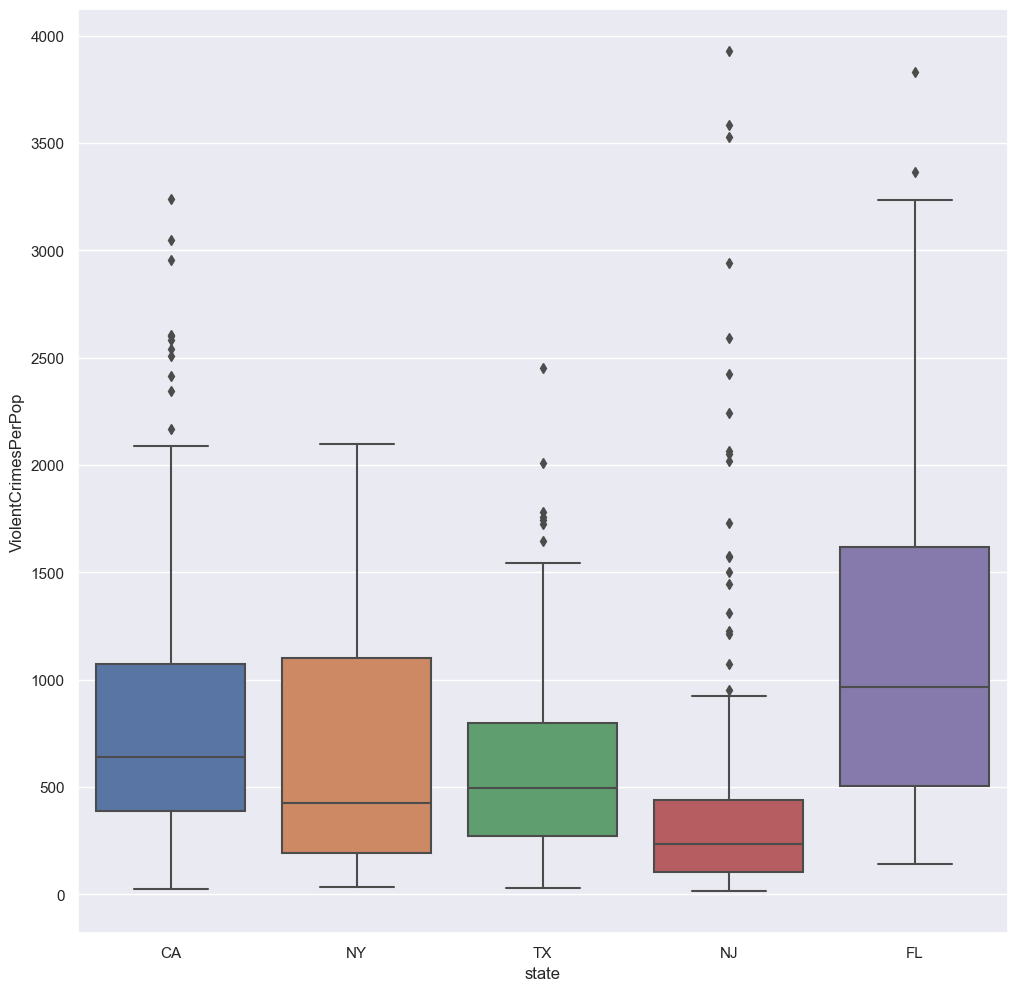

In [324]:
sns.boxplot(x = 'state', y = 'ViolentCrimesPerPop', data=crimesTop5)
plt.show()

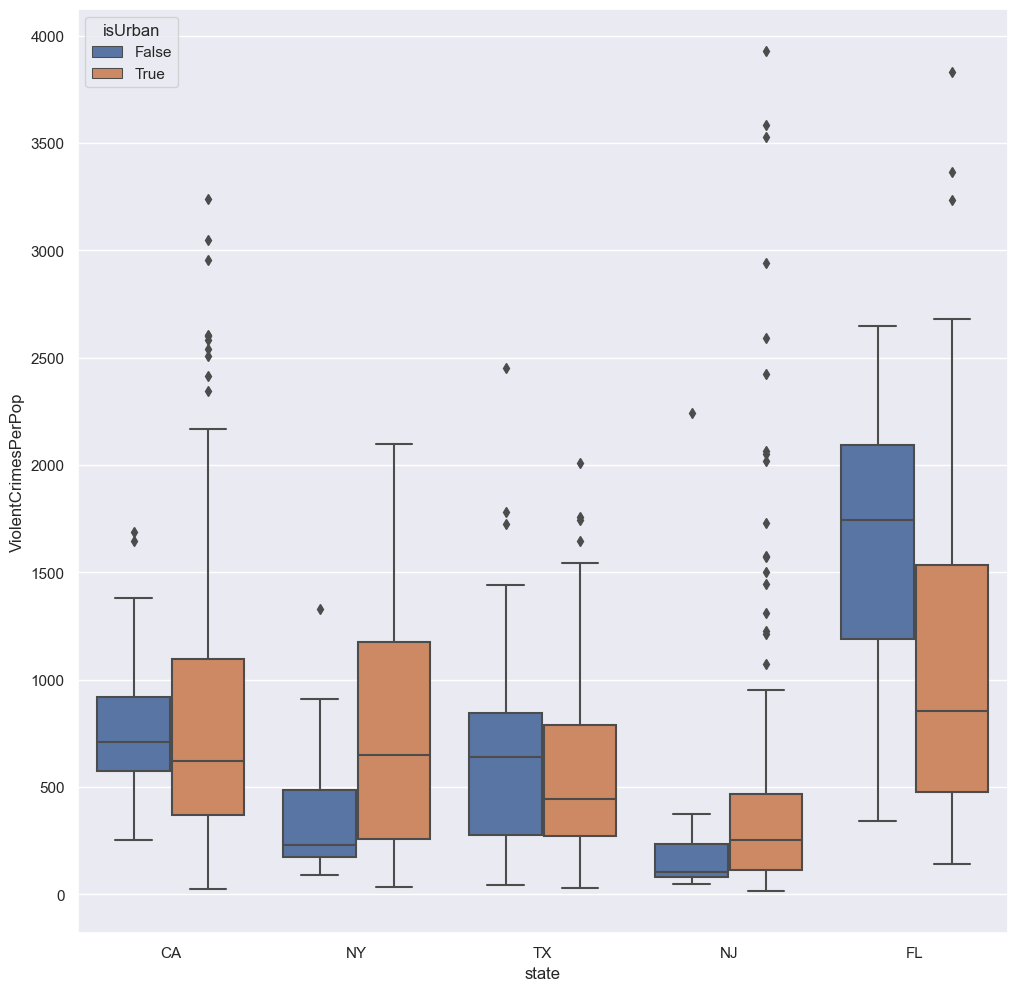

In [325]:
sns.boxplot(x = 'state', y = 'ViolentCrimesPerPop', data=crimesTop5, hue='isUrban')
plt.show()

### Question 7:  <a class="tocSkip">

+ If we randomly pick a community whose `PopDens` is *below-average* (lower than the mean `PopDens` for all communities), find the probability `p` that  its `robbbPerPop` value is less than 30. 
    
+ Using the previous result: suppose that we take a random sample (with replacement) of 15  *below-average* `PopDens` communities. What is the **theoretical** probability that **5 or more** of them will have a `robbbPerPop` value less than 30. 

+ Check that result using a simulation where you take $N = 10000$ samples, each of them with 15 *below-average* `PopDens` communities and find the relative frequency of the event:  5 or more of them have a `robbbPerPop` value less than 30.    
    
**Answer:**

In [326]:
meanPopDens = crimes.PopDens.mean()
meanPopDens

2961.8265951439867

In [327]:
lowDens = crimes.loc[crimes.PopDens < meanPopDens]
#lowDens.PopDens.max()
#lowDens.robbbPerPop < 30

In [328]:
p = (lowDens.robbbPerPop < 30).mean()
p

0.2767191383595692

In [329]:
sum(stats.binom.pmf(range(5, 16), n = 15, p = p))

0.4041187617249589

In [330]:
stats.binom.sf(4, n = 15, p = p)

0.404118761724959

In [331]:
N = 100000
data = lowDens.robbbPerPop 
rng = np.random.default_rng(2022)
samples = rng.choice(data, size = (N, 15), replace=True)
samples

array([[ 24.59,  34.28,  56.92, ...,  20.24,  71.67, 106.62],
       [  8.5 , 106.66,  33.84, ...,  24.87,  19.84, 132.85],
       [164.32,  16.54,  69.85, ..., 217.14,  63.84,  16.49],
       ...,
       [149.77,  21.66,  40.37, ...,  32.4 ,  11.04,  53.38],
       [ 72.83,  44.95,  51.95, ..., 177.91,  45.9 ,  14.47],
       [ 25.5 ,  42.02,  74.04, ..., 164.11,  40.52, 106.23]])

In [332]:
((samples < 30).sum(axis = 1) >= 5).mean()

0.40402

**The following contains the resuts for those who did not remove the data in Question 4**

In [333]:
meanPopDens = crimes2.PopDens.mean()
meanPopDens

2803.496792849632

In [334]:
lowDens = crimes2.loc[crimes2.PopDens < meanPopDens]
#lowDens.PopDens.max()
#lowDens.robbbPerPop < 30

In [335]:
p = (lowDens.robbbPerPop < 30).mean()
p

0.32300542215336947

In [336]:
sum(stats.binom.pmf(range(5, 16), n = 15, p = p))

0.5622509132011646

In [337]:
stats.binom.sf(4, n = 15, p = p)

0.5622509132011642

In [338]:
N = 100000
data = lowDens.robbbPerPop 
rng = np.random.default_rng(2022)
samples = rng.choice(data, size = (N, 15), replace=True)
samples

array([[ 21.66,   9.65,  88.81, ...,  57.99, 520.65,  20.72],
       [ 29.15,  87.85,  45.94, ...,  24.87, 119.84,  40.09],
       [318.07,   0.  , 593.04, ...,  31.45, 116.76,  56.53],
       ...,
       [284.77, 517.78,   7.73, ...,  43.3 ,  14.5 ,  78.2 ],
       [323.88,   0.  ,  34.28, ...,  10.4 , 227.39,   0.  ],
       [458.83, 179.28,  40.83, ...,   5.89,  67.16, 186.12]])

In [339]:
((samples < 30).sum(axis = 1) >= 5).mean()

0.56252

### Question 8:  <a class="tocSkip">

+ Using the whole `crimes` data set. Find the two states with the lowest and highest median values for `PctPopUnderPov`. Then find the two 95% confidence intervals for the means of `assaultPerPop` for each of these two states. What is your conclussion? 
    
**Answer:**

In [340]:
crimes.groupby('state').PctPopUnderPov.median().sort_values()

state
CT     3.870
NJ     4.140
MA     5.100
PA     5.780
MN     5.985
RI     6.675
NH     6.705
AK     7.070
WI     7.500
UT     8.275
OH     8.595
MO     8.895
CA     9.145
NV     9.285
WY     9.690
FL    10.375
IN    10.515
CO    11.050
ME    11.470
VA    11.525
DE    12.450
SD    12.820
IA    12.890
WA    13.010
AZ    13.035
ND    13.965
OR    14.530
NY    14.710
ID    15.340
OK    15.480
MD    15.820
NC    16.005
TN    16.560
DC    16.870
SC    17.050
TX    17.350
AR    17.500
WV    17.895
KY    18.295
AL    19.520
GA    21.330
NM    22.290
MS    25.070
LA    26.170
Name: PctPopUnderPov, dtype: float64

For LA (Lousiana)

In [341]:
LA = crimes.loc[crimes.state == 'LA', :].assaultPerPop
LA.size

19

In [342]:
print("State is LA (Louisiana)")
# Compute the necessary sample values
n = LA.size
print("Sample size = ", n, ", degrees of freedom = ", n - 1)
barX = LA.mean()
print("Sample mean = {:.4}".format(barX))
s = LA.std()
print("Sample standard deviation = {:.4}".format(s))

# Critical point computation with the Student's t:
cl = 0.95
alpha = 1 - cl
crit_point = stats.t.isf(alpha/2, df = n - 1)
print("The critical point for Student's t is {:.4}".format(crit_point))

# Formula for the confidence interval
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

State is LA (Louisiana)
Sample size =  19 , degrees of freedom =  18
Sample mean = 984.9
Sample standard deviation = 733.5
The critical point for Student's t is 2.101
The confidence interval is [631.4, 1.338e+03]


For CT (Connecticut)

In [343]:
CT = crimes.loc[crimes.state == 'CT', :].assaultPerPop
CT

16        37.29
72        54.72
99       964.85
264       32.59
338       35.78
420       15.40
460      158.09
462        0.00
582       18.46
805      136.06
825      384.91
951       93.05
1015      38.00
1045      44.40
1068     247.85
1100      28.25
1121     221.08
1127     149.92
1133     105.08
1140      55.83
1238      39.89
1265      13.55
1281     118.61
1286      60.28
1300     637.32
1358     186.45
1436      82.61
1470    1183.61
1483     230.87
1538     199.96
1600       0.00
1644      45.95
1713     270.39
1781      14.93
1792     112.93
1870      78.19
1889     138.45
1899     302.74
1926       9.48
1966     235.29
1977      54.90
1995      54.31
2129     230.18
2167      66.36
2207     151.38
Name: assaultPerPop, dtype: float64

In [344]:
print("State is CT (Connecticut)")
# Compute the necessary sample values
n = CT.size
print("Sample size = ", n, ", degrees of freedom = ", n - 1)
barX = CT.mean()
print("Sample mean = {:.4}".format(barX))
s = CT.std()
print("Sample standard deviation = {:.4}".format(s))

# Critical point computation with the Student's t:
cl = 0.95
alpha = 1 - cl
crit_point = stats.t.isf(alpha/2, df = n - 1)
print("The critical point for Student's t is {:.4}".format(crit_point))

# Formula for the confidence interval
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

State is CT (Connecticut)
Sample size =  45 , degrees of freedom =  44
Sample mean = 163.1
Sample standard deviation = 233.6
The critical point for Student's t is 2.015
The confidence interval is [92.94, 233.3]


**The following contains the resuts for those who did not remove the data in Question 4**

In [345]:
LA = crimes2.loc[crimes2.state == 'LA', :].assaultPerPop
print("State is LA (Louisiana)")
# Compute the necessary sample values
n = LA.size
print("Sample size = ", n, ", degrees of freedom = ", n - 1)
barX = LA.mean()
print("Sample mean = {:.4}".format(barX))
s = LA.std()
print("Sample standard deviation = {:.4}".format(s))

# Critical point computation with the Student's t:
cl = 0.95
alpha = 1 - cl
crit_point = stats.t.isf(alpha/2, df = n - 1)
print("The critical point for Student's t is {:.4}".format(crit_point))

# Formula for the confidence interval
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

State is LA (Louisiana)
Sample size =  19 , degrees of freedom =  18
Sample mean = 984.9
Sample standard deviation = 733.5
The critical point for Student's t is 2.101
The confidence interval is [631.4, 1.338e+03]


In [346]:
CT = crimes2.loc[crimes2.state == 'CT', :].assaultPerPop
print("State is CT (Connecticut)")
# Compute the necessary sample values
n = CT.size
print("Sample size = ", n, ", degrees of freedom = ", n - 1)
barX = CT.mean()
print("Sample mean = {:.4}".format(barX))
s = CT.std()
print("Sample standard deviation = {:.4}".format(s))

# Critical point computation with the Student's t:
cl = 0.95
alpha = 1 - cl
crit_point = stats.t.isf(alpha/2, df = n - 1)
print("The critical point for Student's t is {:.4}".format(crit_point))

# Formula for the confidence interval
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

State is CT (Connecticut)
Sample size =  69 , degrees of freedom =  68
Sample mean = 127.8
Sample standard deviation = 198.3
The critical point for Student's t is 1.995
The confidence interval is [80.13, 175.4]


### Question 9:  <a class="tocSkip">

+ Using the whole `crimes` data set. Find $\mu_0$, the mean of `autoTheftPerPop` for those communities where `pctUrban < 10` (equivalently, `isUrban` is `False`). 
    
+ Take a random sample (with replacement) of 30 communities with `pctUrban >= 90` (equivalently, `isUrban` is `True`) and use it to test (95% significance level) the **alternative hypothesis:** the mean `autoTheftPerPop` for urban communities is higher than $\mu_0$. Make sure to set `random_state=2022` in the pandas `sample` method (or the equivalent `random.seed` if you use NumPy) to ensure the reproducibility of the sample. 
    
+ **Optional:** consider the sample above as a *pilot study*. What sample size (number of communities) would you need to get 80% power in a test of the same hypothesis, if you want a precision $\delta = 50$ with significance level equal = 95%.  

**Answer:**
    


In [347]:
mu0= crimes.loc[crimes.isUrban == False, :].autoTheftPerPop.mean()
mu0

282.06245746691866

In [348]:
urban_autoTheft = crimes.loc[crimes.isUrban == True, :].sample(n = 30, replace=True, random_state=2022).autoTheftPerPop
urban_autoTheft

1598     197.31
301     1377.89
1114     518.61
420      438.80
1713     236.59
26       301.12
41       318.93
250     1262.72
1437     432.16
1416     717.70
16       508.94
253     1198.53
2056     375.18
1538     623.63
1793     254.79
808     1106.89
87       148.69
253     1198.53
286      730.19
1502     212.14
1628     397.81
1537      49.68
474      254.68
2082      84.09
167     1675.96
1605    2279.29
885      902.23
933      507.58
1979     741.99
1528    1091.60
Name: autoTheftPerPop, dtype: float64

In [349]:
urban_autoTheft.mean()

671.4750000000001

In [350]:
Tscore, pValue = stats.ttest_1samp(urban_autoTheft, 
                                   popmean=mu0,
                                   alternative="greater")
print(Tscore)
print(pValue)

4.055893574045485
0.00017182828509368933


In [370]:
import statsmodels.stats.power as smp


sd = urban_autoTheft.std()
print(sd)
delta = 50
power = 0.8
alpha = 0.05

sample_size = smp.tt_solve_power(effect_size = delta / sd, 
                power = power, alpha = alpha, alternative = "larger")

print("The minimum sample size to get that power is at least {:3d}".format(
        int(np.ceil(sample_size))))

525.8768008255847
The minimum sample size to get that power is at least 686


**The following contains the resuts for those who did not remove the data in Question 4**

In [352]:
mu02 = crimes2.loc[crimes2.pctUrban < 10, :].autoTheftPerPop.mean()
mu02

282.06245746691866

In [353]:
urban_autoTheft2 = crimes2.loc[crimes2.pctUrban >= 90, :].sample(n = 30, replace=True, random_state=2022).autoTheftPerPop
urban_autoTheft2

1598     197.31
301     1377.89
1114     518.61
420      438.80
1713     236.59
26       301.12
41       318.93
250     1262.72
1437     432.16
1416     717.70
16       508.94
253     1198.53
2056     375.18
1538     623.63
1793     254.79
808     1106.89
87       148.69
253     1198.53
286      730.19
1502     212.14
1628     397.81
1537      49.68
474      254.68
2082      84.09
167     1675.96
1605    2279.29
885      902.23
933      507.58
1979     741.99
1528    1091.60
Name: autoTheftPerPop, dtype: float64

In [354]:
urban_autoTheft2.mean()

671.4750000000001

In [355]:
Tscore, pValue = stats.ttest_1samp(urban_autoTheft2, 
                                   popmean=mu0,
                                   alternative="greater")
print(pValue)

0.00017182828509368933


### Question 10:  <a class="tocSkip">

+ Consider only the  communities from the state of California (CA). Make a linear regression model for the variables:  
  $x:$ `autoTheftPerPop`  
  $y:$ `robbbPerPop`  
     
+ What percentage of variability in the response is explained by the model? 
+ What is the increment in `robbPerPop` for each unit increment in `autoTheftPerPop`?
+ Make a scatter plot of these two variables along with the regression line. 
+ What is the predicted `robbPerPop` in a community with `autoTheftPerPop = 800`    
+ What is the first residual of the model (the residual for the first observation)? 

**Answer:**

In [356]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

crimes_CA = crimes[crimes.state == "CA"]

In [357]:
crimes_CA_fit = sm.OLS(crimes_CA.robbbPerPop, sm.add_constant(crimes_CA["autoTheftPerPop"])).fit()
crimes_CA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            robbbPerPop   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     422.5
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.39e-57
Time:                        18:13:35   Log-Likelihood:                -1821.6
No. Observations:                 278   AIC:                             3647.
Df Residuals:                     276   BIC:                             3655.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.8130     16.939     -0.284      0.777     -38.159      28.532
autoTheftPerPop     0.3395      0.017     20.554      0.000       0.307       0.372
==============================================================================
Omnibus:                       86.179   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.716
Skew:                           1.396   Prob(JB):                     3.25e-53
Kurtosis:                       6.616   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

+ The table answers two questions: the percentage of variability explained by the model is R-squared 0.605, and the per unit increment in `robbbPerPop` is the coefficient $b_1$ of `autoTheftPerPop` in the model `0.3395`.


Prediction for $x = 800$, two ways:

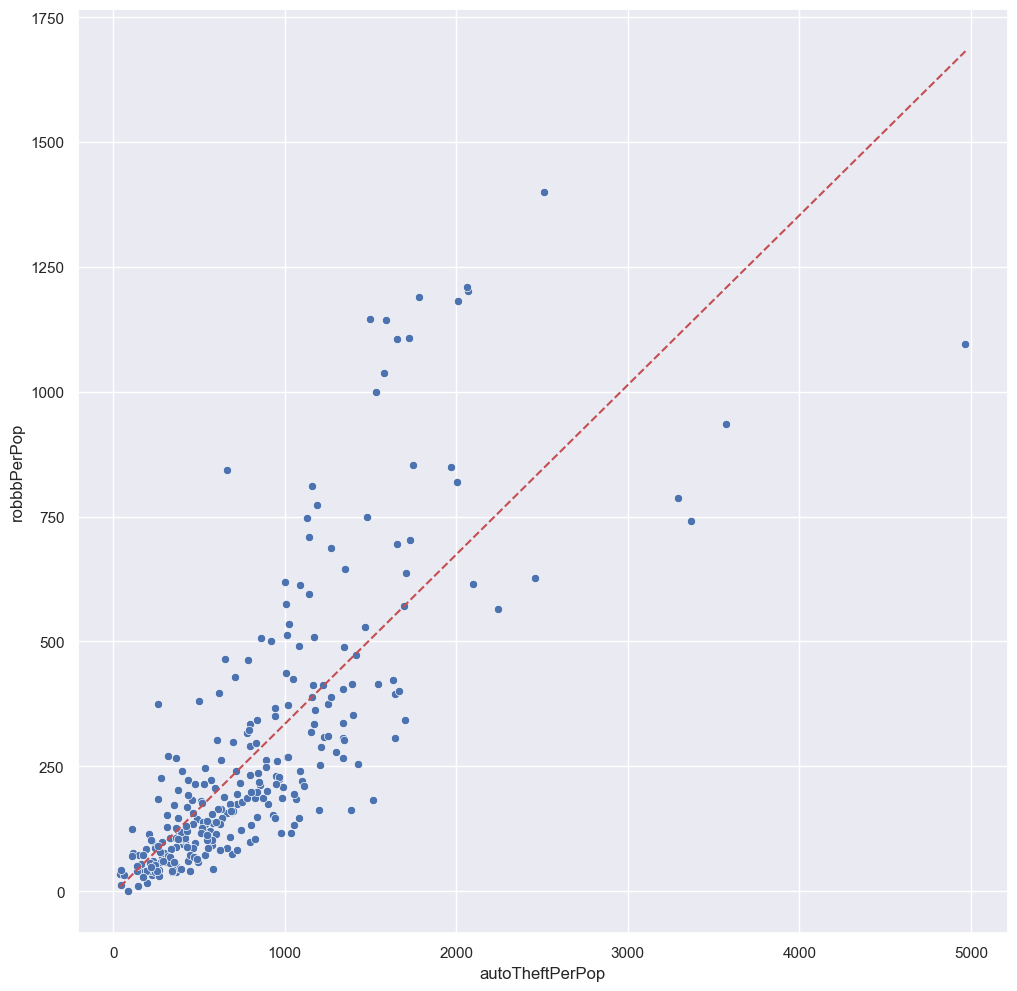

In [358]:
sns.scatterplot(x = "autoTheftPerPop", y = "robbbPerPop", data=crimes_CA)
X = crimes_CA.autoTheftPerPop
Y = crimes_CA.robbbPerPop
X_new = np.linspace(X.min(), X.max(), 100)
#Y_new = crimes_CA_fit.params[0] + crimes_CA_fit.params[1] * X_new
X_new = sm.add_constant(X_new)
crimes_CA_fit.pred = crimes_CA_fit.get_prediction(X_new)
Y_new = crimes_CA_fit.pred.summary_frame(alpha=0.05)['mean']
plt.plot(X_new[:,1], Y_new, "r--")
#plt.plot(X_new, Y_new, "r--")

In [359]:
Y_800 = crimes_CA_fit.params[0] + crimes_CA_fit.params[1] * 800
Y_800

266.8052081440665

In [360]:
X_new = [1, 800]
#X_new = sm.add_constant(X_new, has_constant='add')
print(X_new)
crimes_CA_fit.pred = crimes_CA_fit.get_prediction(X_new)
Y_new = crimes_CA_fit.pred.summary_frame()['mean']
Y_new

[1, 800]


0    266.805208
Name: mean, dtype: float64

First residual:

In [361]:
crimes_CA_fit.resid.iloc[0]

608.201198799808

In [362]:
Y.iloc[0] - (crimes_CA_fit.params[0] + crimes_CA_fit.params[1] * X.iloc[0])

608.2011987998079

### Otras ideas:

In [363]:
# crimes_cols = list(crimes.columns)
# crimes_cols
#
#sns.pairplot(data = crimes.loc[:, 'murdPerPop':'arsonsPerPop'])
#plt.show()

In [364]:
# crimes['Pov2'] = np.log(1/crimes.PctPopUnderPov)
# LM_fit = sm.OLS(crimes.medIncome, sm.add_constant(crimes["Pov2"])).fit()
# LM_fit.summary()

In [365]:
# crimes['assaultsPerPop'] = crimes.assaults / crimes.population
# crimes['murdersPerPop'] = crimes.murders / crimes.population

In [366]:
# crimes.state.value_counts()[:25]

In [367]:
# crimes["robberies_perPop"] = crimes.robberies / crimes.population
# crimes["autoTheft_perPop"] = crimes.autoTheft / crimes.population

In [368]:
# sns.scatterplot(x = "PopDens", y = "ViolentCrimesPerPop", data=crimes[crimes.state == 'CA'])


In [369]:
2.4/0.8

2.9999999999999996